# Project: Health & Demographic Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction.

This notebook shows the analysis of health and demographic data for different countries for the period 2014-2015, obtained from Global Health to answer the following questions:

   1. Are there any missing values in the data set? What, if anything should be done about them if there are?

   2. Are there any other problems with the data? If so, fix them.

   3. Identify the country with the highest and lowest % of their population under 15 and the one with the highest.

   4. Which region has the highest and lowest % of their population over 60?
   
   5. Which regions has the highest and lowest GNI?
   
   6. Which region has the highest and lowest population?
   
   7. Does fertility decrease as income increases? Are there any countries that don’t seem to follow this relation?

   8. Which regions have the lowest literacy rates?

   9. Which regions have the lowest child mortality rates?

   10. What is the life expectancy across different regions? Create a box-and-whisker plot to investigate this. What can we conclude about         life expectancy across different regions?

   11. How is life expectancy related to wealth across different regions? How is wealth related to fertility across different regions? Do           these relationships hold for African countries?

   12. Create appropriate graphs to visually represent the relationship between literacy and life expectancy by region, and then for African       countries. What can be concluded from the graphs? How confident can we be in the relationships represented here?
   
The dataset can be downloaded [here](http://syllabus.africacode.net/projects/data-science-specific/bootcamp-exploratory-data-analysis/data.csv)

Here is some  [metadata](http://syllabus.africacode.net/projects/data-science-specific/bootcamp-exploratory-data-analysis/data-info.txt) that gves more insight into data.

<a id='wrangling'></a>
## Data wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings('ignore')
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
df = pd.read_csv("data.csv")
df.head()

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,54.26,NaN,1140.0,NaN,NaN
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,96.39,NaN,8820.0,NaN,NaN
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,98.99,NaN,8310.0,98.2,96.4
3,Andorra,Europe,78,15.20,22.86,NaN,82,3.2,75.49,NaN,NaN,78.4,79.4
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,48.38,70.1,5230.0,93.1,78.2


In [3]:
#View the dataset shape
df.shape

(194, 13)

- Data consists of 13 columns and 194 entries.

In [4]:
#View all columns present in the dataset
df.columns

Index(['Country', 'Region', 'Population', 'Under15', 'Over60', 'FertilityRate',
       'LifeExpectancy', 'ChildMortality', 'CellularSubscribers',
       'LiteracyRate', 'GNI', 'PrimarySchoolEnrollmentMale',
       'PrimarySchoolEnrollmentFemale'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        194 non-null    object 
 1   Region                         194 non-null    object 
 2   Population                     194 non-null    int64  
 3   Under15                        194 non-null    float64
 4   Over60                         194 non-null    float64
 5   FertilityRate                  183 non-null    float64
 6   LifeExpectancy                 194 non-null    int64  
 7   ChildMortality                 194 non-null    float64
 8   CellularSubscribers            184 non-null    float64
 9   LiteracyRate                   103 non-null    float64
 10  GNI                            162 non-null    float64
 11  PrimarySchoolEnrollmentMale    101 non-null    float64
 12  PrimarySchoolEnrollmentFemale  101 non-null    flo

- Above datatypes of each column can be seen.
- It can aslo be noted that some columns contains missing values indicated by the number of non-null values.


below the total number of missing values per column will be explored:

In [6]:
df.isnull().sum()

Country                           0
Region                            0
Population                        0
Under15                           0
Over60                            0
FertilityRate                    11
LifeExpectancy                    0
ChildMortality                    0
CellularSubscribers              10
LiteracyRate                     91
GNI                              32
PrimarySchoolEnrollmentMale      93
PrimarySchoolEnrollmentFemale    93
dtype: int64

- The missing values per column can be seen above.
- PrimarySchoolEnrollmentMale and PrimarySchoolEnrollmentFemale have the highest number of missing values
- CellularSubsibers have the the least number of missing values.

In [7]:
#Check duplicates 

df.duplicated().sum()

0

- Dataset contains no duplicated.

In [8]:
df.Country.nunique()

194

- Data contains 194 countries in total.
- There are no duplicates

In [9]:
df.Region.value_counts()

Europe                   53
Africa                   46
Americas                 35
Western Pacific          27
Eastern Mediterranean    22
South-East Asia          11
Name: Region, dtype: int64

- There are 6 regions represented as can be seen above

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,194.0,36359.974227,137903.141241,1.00,1695.7500,7790.000,24535.2500,1390000.00
Under15,194.0,28.732423,10.534573,13.12,18.7175,28.650,37.7525,49.99
Over60,194.0,11.163660,7.149331,0.81,5.2000,8.530,16.6875,31.92
FertilityRate,183.0,2.940656,1.480984,1.26,1.8350,2.400,3.9050,7.58
LifeExpectancy,194.0,70.010309,9.259075,47.00,64.0000,72.500,76.0000,83.00
ChildMortality,194.0,36.148969,37.992935,2.20,8.4250,18.600,55.9750,181.60
CellularSubscribers,184.0,93.641522,41.400447,2.57,63.5675,97.745,120.8050,196.41
LiteracyRate,103.0,83.710680,17.530645,31.10,71.6000,91.800,97.8500,99.80
GNI,162.0,13320.925926,15192.988650,340.00,2335.0000,7870.000,17557.5000,86440.00
PrimarySchoolEnrollmentMale,101.0,90.850495,11.017147,37.20,87.7000,94.700,98.1000,100.00


- Above the statistical information for each column is described
- Below we reperesnt the above information visually on boxplots. This will also highlight if any column contains outliers.
- This is important as outliers ccan distort the data and results in distorted findings.

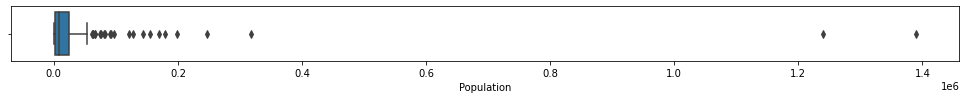

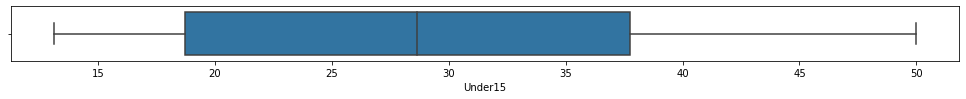

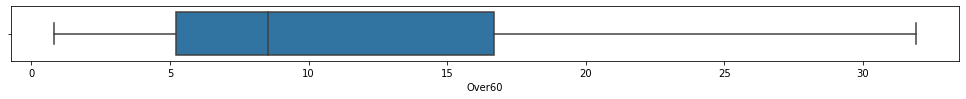

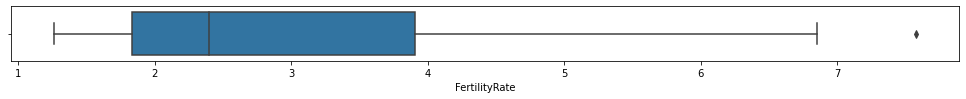

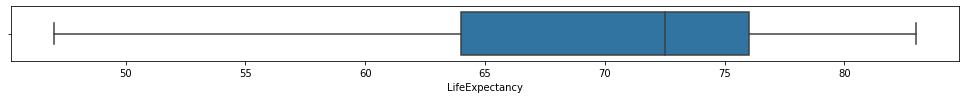

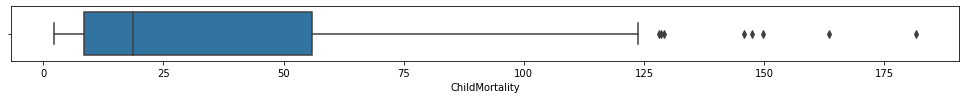

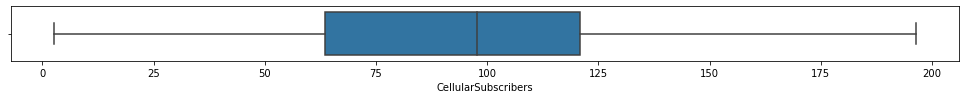

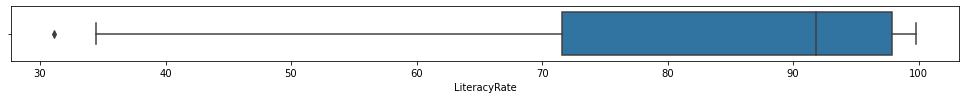

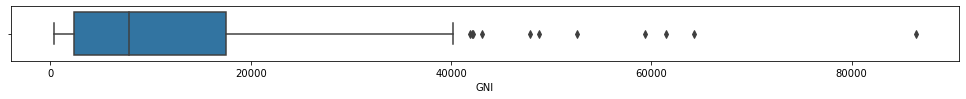

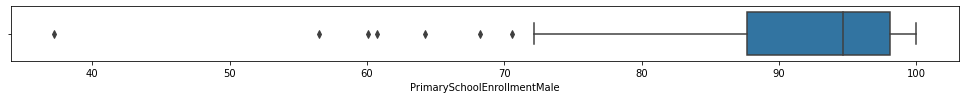

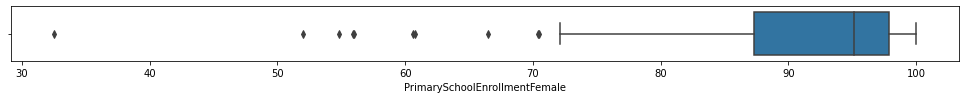

In [11]:
plt.rcParams.update({'figure.max_open_warning': 0})
df1=df.select_dtypes(exclude=['object'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column)

- Above boxplots of all columns that are of numeric datatypes can be seen
- Columns such as Population, ChildMortality, GNI etc contains outliers.
- Outliers can be identified by the black little dots that are outside the minimum and maximum values of the box plot.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        194 non-null    object 
 1   Region                         194 non-null    object 
 2   Population                     194 non-null    int64  
 3   Under15                        194 non-null    float64
 4   Over60                         194 non-null    float64
 5   FertilityRate                  183 non-null    float64
 6   LifeExpectancy                 194 non-null    int64  
 7   ChildMortality                 194 non-null    float64
 8   CellularSubscribers            184 non-null    float64
 9   LiteracyRate                   103 non-null    float64
 10  GNI                            162 non-null    float64
 11  PrimarySchoolEnrollmentMale    101 non-null    float64
 12  PrimarySchoolEnrollmentFemale  101 non-null    flo

<a id='cleaning'></a>
## Data Cleaning

Extract only the columns relevant for the analysis:
    1. Country
    2. Region
    3. Population
    4. Under15
    5. Over60
    6. FertilityRate
    7. LiteracyRate
    8. LifeExpectancy
    9. ChildMortality
    10. GNI

In [13]:
new_df = df[["Country", "Region", "Population", "Under15", "Over60", "FertilityRate", "LifeExpectancy", "ChildMortality", "LiteracyRate","GNI"]]

In [14]:
#View first 5 observations of the new dataset
new_df.head()

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,LiteracyRate,GNI
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,NaN,1140.0
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,NaN,8820.0
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,NaN,8310.0
3,Andorra,Europe,78,15.20,22.86,NaN,82,3.2,NaN,NaN
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,70.1,5230.0


- Above is the new dataframe which consists of only column that will be used for this project.

In [15]:
#Shape of the new dataset
new_df.shape

(194, 10)

In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         194 non-null    object 
 1   Region          194 non-null    object 
 2   Population      194 non-null    int64  
 3   Under15         194 non-null    float64
 4   Over60          194 non-null    float64
 5   FertilityRate   183 non-null    float64
 6   LifeExpectancy  194 non-null    int64  
 7   ChildMortality  194 non-null    float64
 8   LiteracyRate    103 non-null    float64
 9   GNI             162 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 15.3+ KB


- FerrtilityRate, LiteracyRate and GNI columns contains missing values.


Replacing missing values.

>Different methods can be used to handle missing values such as:

         - Deleting the columns with missing data

         - Deleting the rows with missing data

         - Filling the missing data with a mean, mode or median

         - Filling missing values with interpolation

         - Filling missing values with a value such as 0

         - Filling with a Regression Model

>For the purpose of this project the missing values were filled with median value of each column.
>This is to avoid loosing valuable information or having distorted information by removing rows or columns with null values.- - >Also the median is more robust to outliers as compared to the mean and we have noted in the wrangling process that this columns contains outliers

In [17]:
#FertilityRate
new_df['FertilityRate'].fillna(value=new_df['FertilityRate'].median(), inplace=True)
#LiteracyRate
new_df['LiteracyRate'].fillna(value=new_df['LiteracyRate'].median(), inplace=True)
#GNI
new_df['GNI'].fillna(value=new_df['GNI'].median(), inplace=True)


In [18]:
new_df.isnull().sum()

Country           0
Region            0
Population        0
Under15           0
Over60            0
FertilityRate     0
LifeExpectancy    0
ChildMortality    0
LiteracyRate      0
GNI               0
dtype: int64

As can be seen above, missing values has been filled.

<a id='eda'></a>
## Exploratory Data Analysis

In this section we explore the data further and dicover patterns and trends in our data.

This will aid in answering questions posed at the beginning of the project.

### 1. Identify the country with the lowest % of their population under 15 and one with the highest.

In [19]:
new_df.loc[new_df["Under15"].idxmin()]

Country                     Japan
Region            Western Pacific
Population                 127000
Under15                     13.12
Over60                      31.92
FertilityRate                1.39
LifeExpectancy                 83
ChildMortality                3.0
LiteracyRate                 91.8
GNI                       35330.0
Name: 85, dtype: object

- Japan is the country with the lowest percentage of under 15 population

In [20]:
new_df.loc[new_df["Under15"].idxmax()]

Country            Niger
Region            Africa
Population         17157
Under15            49.99
Over60              4.26
FertilityRate       7.58
LifeExpectancy        56
ChildMortality     113.5
LiteracyRate        91.8
GNI                720.0
Name: 123, dtype: object

- Niger is the country with the highest Under 15 population

### 2. Which region has the highest and lowest % of their population over 60?

In [21]:
new_df.loc[new_df["Over60"].idxmax()]

Country                     Japan
Region            Western Pacific
Population                 127000
Under15                     13.12
Over60                      31.92
FertilityRate                1.39
LifeExpectancy                 83
ChildMortality                3.0
LiteracyRate                 91.8
GNI                       35330.0
Name: 85, dtype: object

- Western Pacific is the region with highest percentage of over 60 population

In [22]:
new_df.loc[new_df["Over60"].idxmin()]

Country            United Arab Emirates
Region            Eastern Mediterranean
Population                         9206
Under15                           14.41
Over60                             0.81
FertilityRate                      1.84
LifeExpectancy                       76
ChildMortality                      8.4
LiteracyRate                       91.8
GNI                             47890.0
Name: 182, dtype: object

### 3. Which regions has the highest and lowest GNI

In [23]:
new_df.loc[new_df["GNI"].idxmax()]

Country                           Qatar
Region            Eastern Mediterranean
Population                         2051
Under15                           13.28
Over60                             1.73
FertilityRate                      2.06
LifeExpectancy                       82
ChildMortality                      7.4
LiteracyRate                       96.3
GNI                             86440.0
Name: 137, dtype: object

Eastern Meditteanean has  the country(Qatar) with the highest gross national income per year

In [24]:
new_df.loc[new_df["GNI"].idxmin()]

Country           Democratic Republic of the Congo
Region                                      Africa
Population                                   65705
Under15                                      45.11
Over60                                        4.51
FertilityRate                                 6.15
LifeExpectancy                                  49
ChildMortality                               145.7
LiteracyRate                                  66.8
GNI                                          340.0
Name: 47, dtype: object

- African Region has the country(Democratuc Republic of the Conger ) with the lowest gross national income per year

### 4. Which region has the highest and lowest population?

In [25]:
new_df.loc[new_df["Population"].idxmax()]

Country                     China
Region            Western Pacific
Population                1390000
Under15                     17.95
Over60                      13.42
FertilityRate                1.66
LifeExpectancy                 76
ChildMortality               14.0
LiteracyRate                 94.3
GNI                        8390.0
Name: 35, dtype: object

- Western pacific has the highest population

In [26]:
new_df.loc[new_df["Population"].idxmin()]

Country                      Niue
Region            Western Pacific
Population                      1
Under15                     30.61
Over60                       9.07
FertilityRate                 2.4
LifeExpectancy                 72
ChildMortality               25.1
LiteracyRate                 91.8
GNI                        7870.0
Name: 125, dtype: object

- Country named Niue in the Western Pacific has a population 1 which is a bit odd.

### 5. Does fertility decrease as income increases? Are there any countries that don’t seem to follow this relation?

In [27]:
correlation = new_df['GNI']. corr(new_df['FertilityRate'])
correlation

-0.4962083206230654

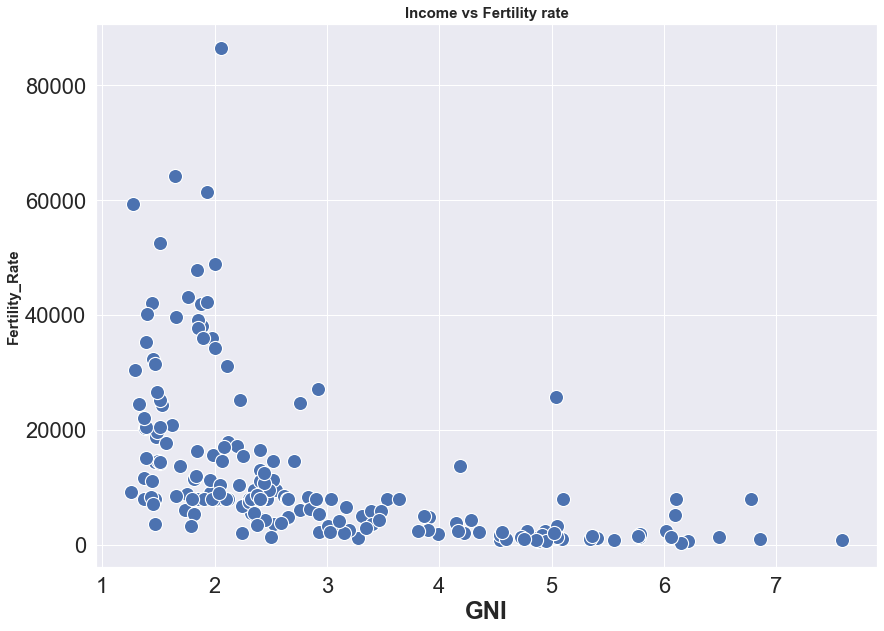

In [28]:
sns.set(font_scale= 2, rc = {'figure.figsize':(14,10)})
sns.scatterplot(data= new_df,x= "FertilityRate",y= "GNI", sizes= (20, 500), s =200)
plt.xlabel('GNI', weight= 'bold')
plt.ylabel('Fertility_Rate', weight= 'bold', fontsize=15)
plt.title('Income vs Fertility rate', weight= 'bold', fontsize=15)
plt.show()

- There is a negative 0.5 cirrelation between income and fertility rate
- This means as income increases, fertility rate decreases

### 6. Which regions have the lowest and highest literacy rates?

In [29]:
new_df.loc[new_df["LiteracyRate"].idxmin()]

Country             Mali
Region            Africa
Population         14854
Under15            47.14
Over60              4.29
FertilityRate       6.85
LifeExpectancy        51
ChildMortality     128.0
LiteracyRate        31.1
GNI               1040.0
Name: 104, dtype: object

- Africa is the region with the country (Mali) that has the lowest literacy rate

In [30]:
new_df.loc[new_df["LiteracyRate"].idxmax()]

Country               Cuba
Region            Americas
Population           11271
Under15              16.58
Over60               17.95
FertilityRate         1.46
LifeExpectancy          78
ChildMortality         5.5
LiteracyRate          99.8
GNI                 7870.0
Name: 43, dtype: object

- Americas are the region with the country(Cuba) that has the highest literacy rate.

### 7. Which region have the lowest and highest child mortality rates?

In [31]:
new_df.loc[new_df["ChildMortality"].idxmin()]

Country           Luxembourg
Region                Europe
Population               524
Under15                17.46
Over60                 19.15
FertilityRate           1.65
LifeExpectancy            82
ChildMortality           2.2
LiteracyRate            91.8
GNI                  64260.0
Name: 99, dtype: object

- Europe is the region with the lowest child mortality

In [32]:
new_df.loc[new_df["ChildMortality"].idxmax()]

Country           Sierra Leone
Region                  Africa
Population                5979
Under15                  41.74
Over60                    4.41
FertilityRate             4.86
LifeExpectancy              47
ChildMortality           181.6
LiteracyRate              42.1
GNI                      840.0
Name: 153, dtype: object

- Afica has the highest rate of child Mortality

### 8. What is the life expectancy and fertility rate across different regions? Create a box-and-whisker plot to investigate this. What can we conclude about life expectancy across different regions?

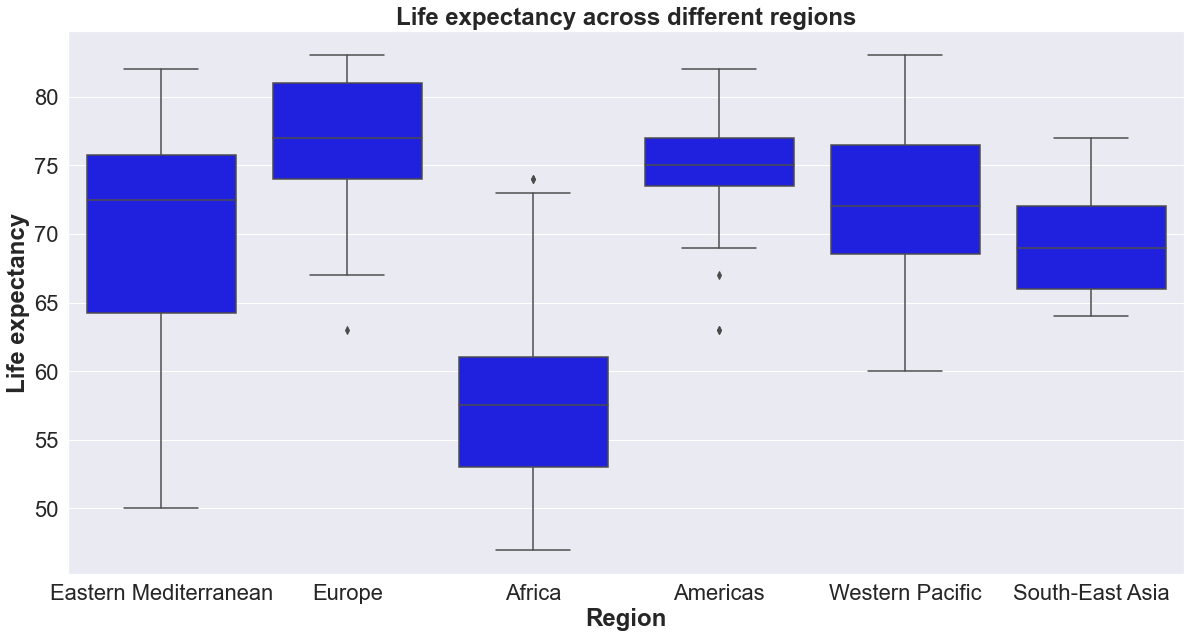

In [33]:
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (20,10)
sns.boxplot(x='Region', y='LifeExpectancy', data= new_df , color='blue')
plt.xlabel('Region', weight= 'bold')
plt.ylabel('Life expectancy', weight= 'bold')
plt.title('Life expectancy across different regions', weight= 'bold')
plt.show()

**Eastern Meditterranean**
- This region has a minimum life expectancy of 50 years, which about 3 years more from the African region
- The maximum life expectancy is 83 years
- The median life expectancy is 73 years

**Europe**
- Europe countries have a minimum life expectancy of about 67
- This region has a maximum life expectancy of 84 years
- While the median life expectancy in years is 77

**Africa**
- Africa has a minimum life expectancy of about 42 years which is the lowest amongst all regions.
- It has a maximum life expactancy of about 73 years
- The median life expactancy is about 53 years

**Americas**
- Americas have a minimun life expactancy of 68, with a few outliers at 67 and 63 years.
- This is the region with the highest minimum life expectancy in years as compared to other regions.
- The maximum life exoectancy in years is about 83 years
- The median life expectancy in years is 75

**Western Pacific**
- The western pacific has minimum life expectancy of 60 years
- The maximum life expactancy is about 84 years
- While the median age is 73

**South-East Asia**
- South -East Asia has a minimum life expectancy of 64
- A maximum of 73
- While the median life expatancy is 78

African countries has a lower life expectancy as compared to other regions
Americas have a higher life expectancy.

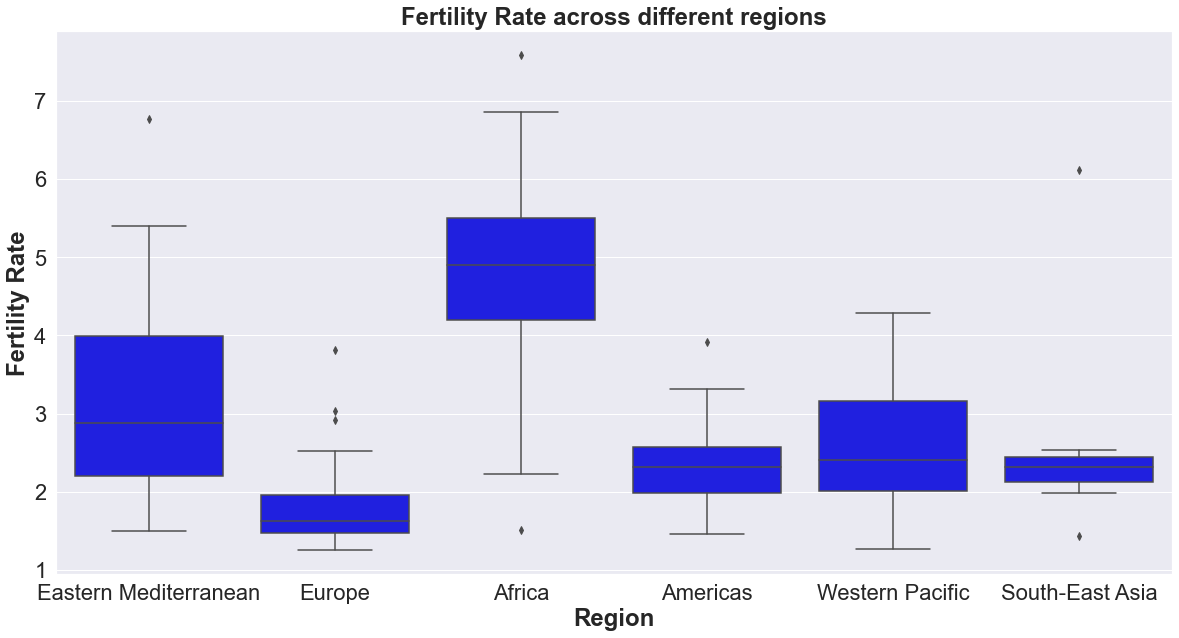

In [34]:
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (20,10)
sns.boxplot(x='Region', y='FertilityRate', data= new_df , color='blue')
plt.xlabel('Region', weight= 'bold')
plt.ylabel('Fertility Rate', weight= 'bold')
plt.title('Fertility Rate across different regions', weight= 'bold')
plt.show()

- African Regions have the highest fertility rate as compared to other regions
- The Easter Mediterranean comes second on terms of fertility rate
- Europe seems to have the lowest fertility rate.

### 9. How is life expectancy related to wealth across different regions? How is wealth related to fertility across different regions? Do these relationships hold for African countries?

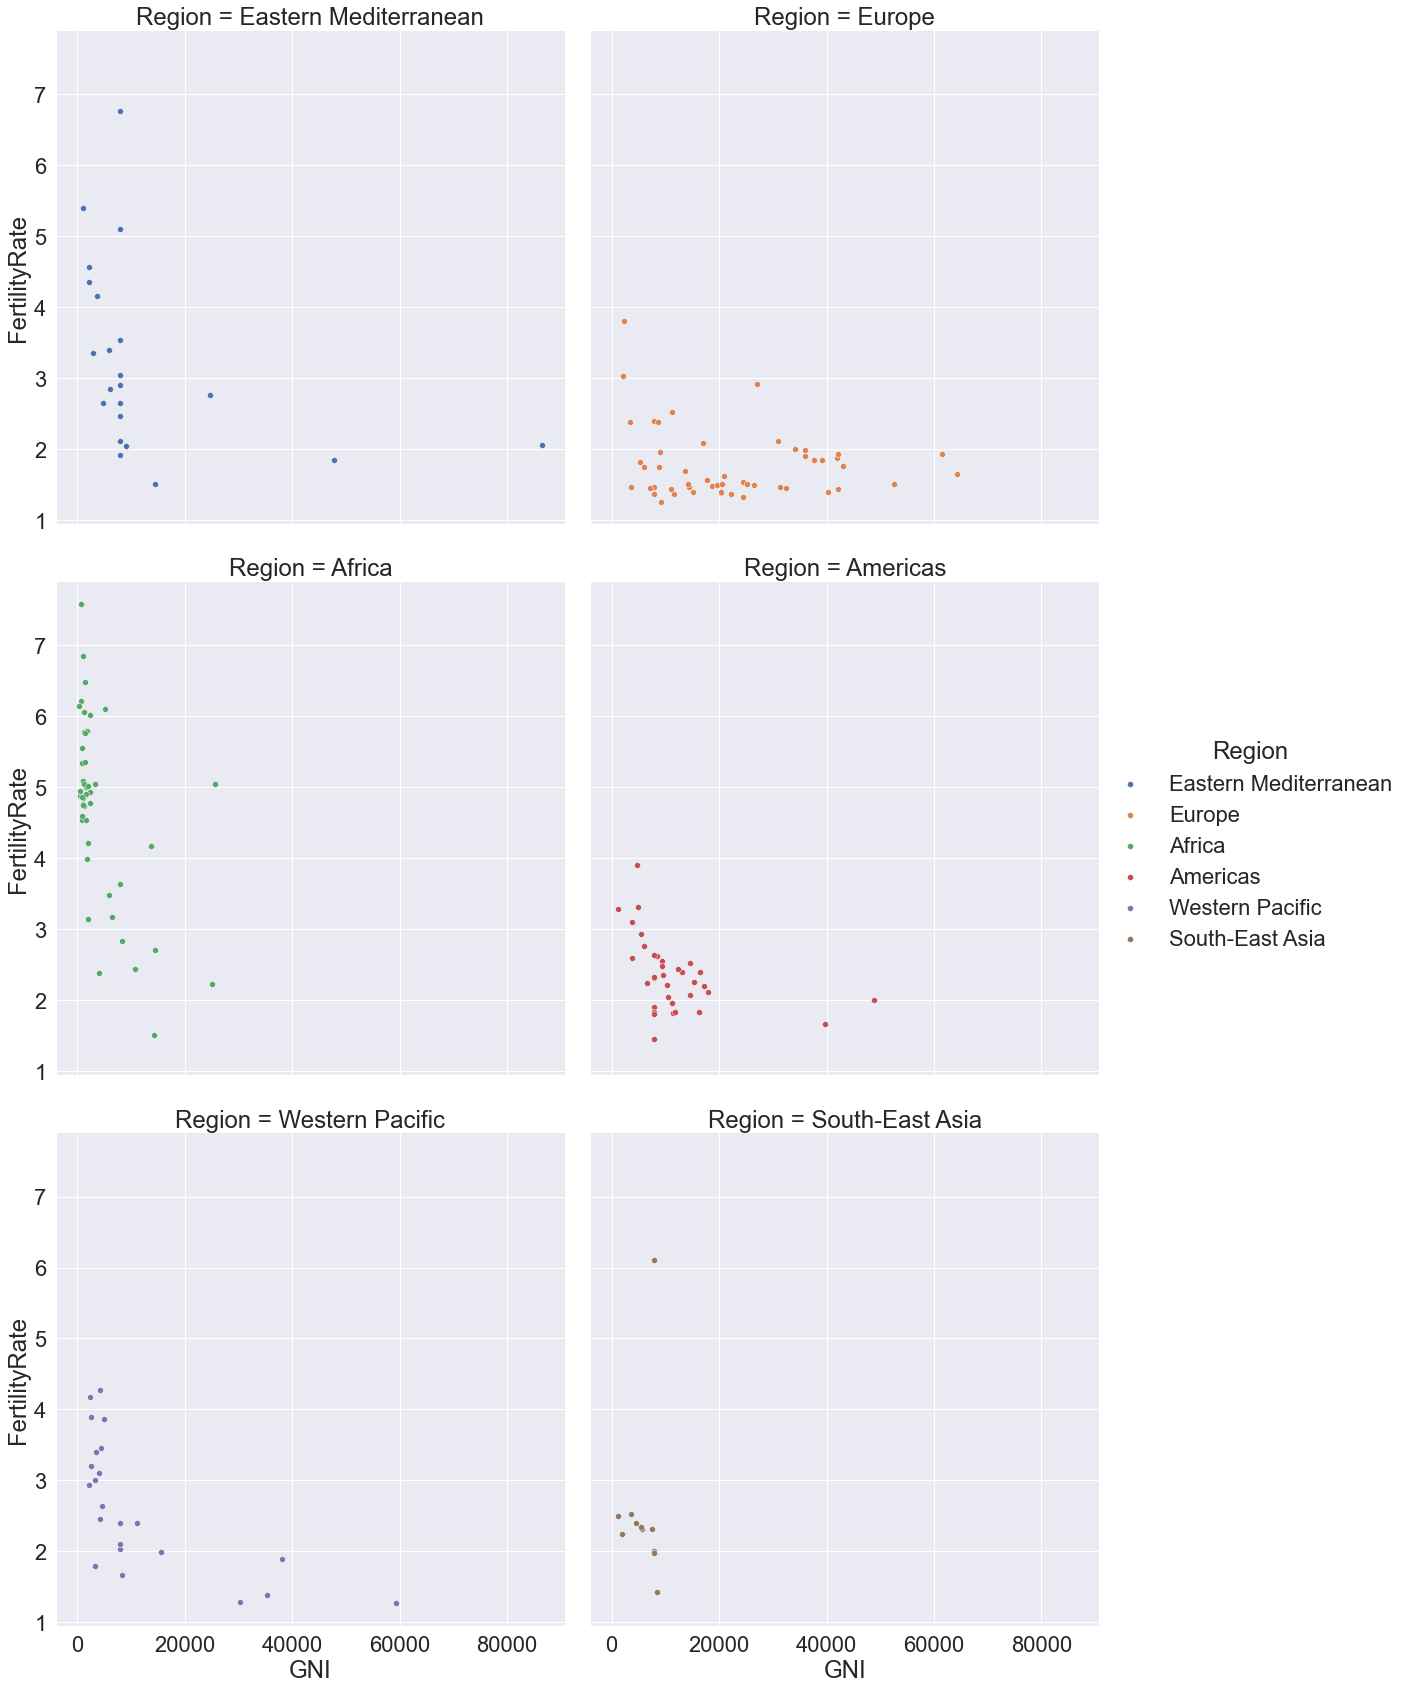

In [35]:
sns.set(font_scale= 2)
grid = sns.FacetGrid(new_df, col = "Region", hue = "Region", col_wrap=2, height=8)
grid.map(sns.scatterplot, "GNI", "FertilityRate")
grid.add_legend()
plt.show()

### 10. Create appropriate graphs to visually represent the relationship between GNI and life expectancy by region

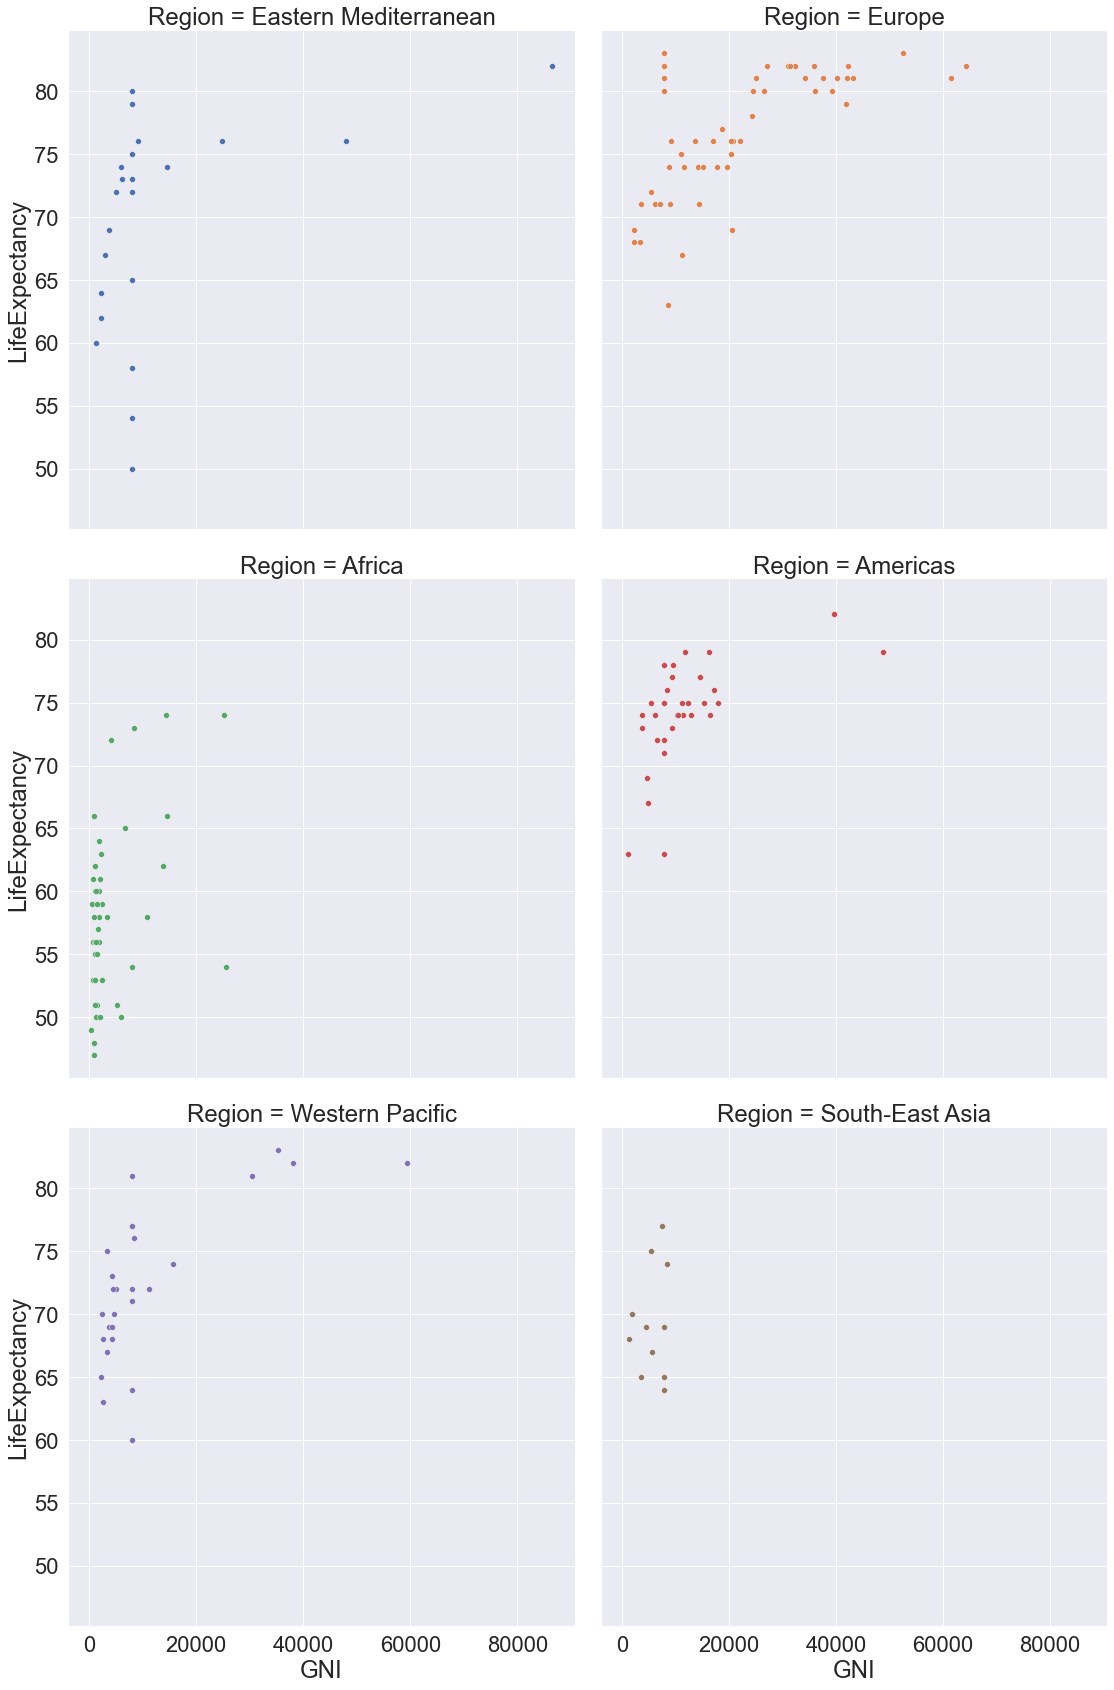

In [36]:
sns.set(font_scale= 2)
grid = sns.FacetGrid(new_df, col = "Region", hue = "Region", col_wrap=2, height= 8)
grid.map(sns.scatterplot, "GNI", "LifeExpectancy")
plt.show()

- There seems to be very little to no correlation between GNI and life expectancy for Eatern Mediterranean regions.
- Europe, Amercas and Western pacific regions have a positive correlation between life expectancy and GNI. AS GNI increases so does life expectancy.
- African regions and South-east Asia seems to have no correlation between the two variables.

### 11. Create appropriate graphs to visually represent the relationship between literacy and life expectancy by region


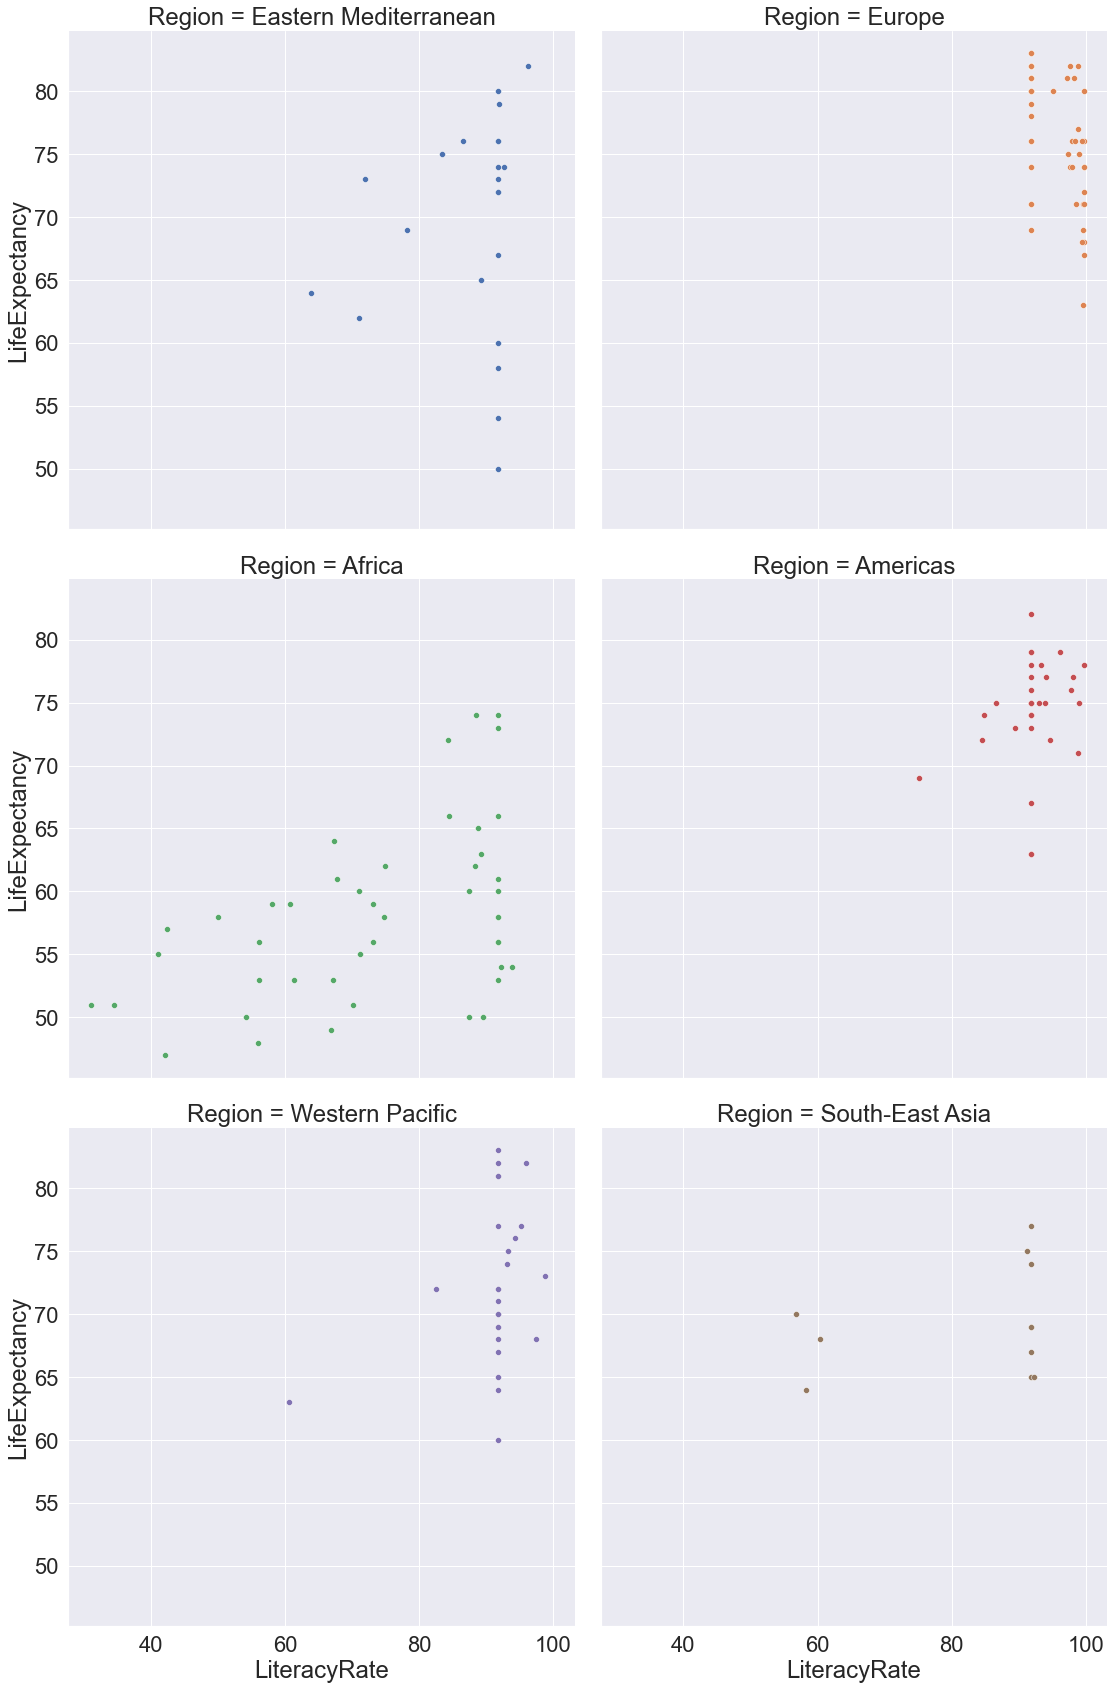

In [37]:
sns.set(font_scale= 2)
grid = sns.FacetGrid(new_df, col = "Region", hue = "Region", col_wrap=2, height= 8)
grid.map(sns.scatterplot, "LiteracyRate", "LifeExpectancy")
plt.show()

- There seems to be no correlation between Literacy rate and life expectancy for all regions except African region
- The African region seems to have a slight positive correlation, Life expectancy increases as Literacy rate increase.

<a id='conclusions'></a>
## Conclusions

- The purpose of this project was to analyse the health and demographic data for different countries for the period 2014-2015, from data obtained from Global Health and answer speccified questions.

**Limitations**
- The dataset was found to contain outliers, for the purpose of this project the outliers were not removed, further investigations would need to be conducted to know where outliers originates from
- Any other issues fetected were addressed such as missing values imputation.
- Once the data was cleaned, the next step performed was the exloratory data analysis to discover patterns and answer the questions.

**Findings**
- It was found that the region with the lowest GNI is Africa, it has low literacy rate , low life expectancy in years, high child mortality and high fertility rate as compared to other regions.
- Japan in the western pacific has the lowest under 15 population while Niger in AFRica has the highest.
- While Japan has the lowest under 15 population, it the highest Over 60 percentage and it was not Japan has the highest maximum life expectancy in years.
- Qatar in the Eastern Mediterrannean has the highest gross national income per year
- Mali in Africa has the lowest literacy rate while cuba in America has the highest literacy rate.
- Africa has high child Mortality while Europe has the lowest child Mortality
- It seems for most regions, fertility rate tends to decrease as the GNI increases. So there is a negative correlation between GNI and fertility rate
- Foor most regions a positive correlation between GNI and life expectancy exists. As GNI increases, life expectancy tends to increase except for Africa and South-east Asia.
- There is no relationship between life expectancy and literacy rates for most regions. However for Africa the Life expectancy slightly increases as literacy rate increases.
